In [1]:
# importing relevant packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import string
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# storing the public firms csv file as a Pandas dataframe
df1= pd.read_csv('public_firms.csv')

In [86]:
df1

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa
0,1004,1994,USA,aar corp,1988/01/01,5080,13.375,22.487,10.463,425.814,451.395,0.024572
1,1004,1995,USA,aar corp,1988/01/01,5080,22.000,33.606,16.012,437.846,504.990,0.036570
2,1004,1996,USA,aar corp,1988/01/01,5080,30.250,51.705,23.025,529.584,589.328,0.043478
3,1004,1997,USA,aar corp,1988/01/01,5080,38.750,17.222,35.657,670.559,782.123,0.053175
4,1004,1998,USA,aar corp,1988/01/01,5080,23.875,8.250,41.671,726.630,918.036,0.057348
...,...,...,...,...,...,...,...,...,...,...,...,...
209207,345980,2019,USA,contextlogic inc,2020/12/16,5961,NaN,744.000,-129.000,1366.000,1901.000,-0.094436
209208,345980,2020,USA,contextlogic inc,2020/12/16,5961,18.240,1965.000,-745.000,2397.000,2541.000,-0.310805
209209,347085,2018,SGP,karooooo ltd,2021/04/01,7370,NaN,3.692,16.851,108.754,120.390,0.154946
209210,347085,2019,SGP,karooooo ltd,2021/04/01,7370,NaN,9.339,18.467,117.551,123.708,0.157098


**Part 1. Quantitative Analysis of the Industry Sector**

**A. Industry Sector Selection and Data Filtering**

1. The file "data/major_groups.csv" contains a list of major industry sectors and their
corresponding codes (column "major_group"). Your first task is to choose at least one
industry sector that interests your group. It is okay if multiple groups choose the same industry
sector, so you don’t need to coordinate with other groups.

Note: We selected the Oil & Gas industry as the subject of our analysis.

2. Next, filter the data in "data/public_firms.csv" to only include the firms belonging to the
industry sector(s) you have selected. You can use the "major_group" value, which corresponds
to the first two digits of each firm’s SIC code,1 to identify relevant firms. 

In [3]:
#Name, version, company of AI tool: ChatGPT Model GPT4o mini
#Chat objective: to understand the application of a Python function code and proper syntax in our notebook
#Use of AI-generated results: We used it to understand part of the astype(str) and .startswith() function in the #context of filtering our dataset for oil and gas firms (i.e. those firms whose SIC codes begin with 13). We took #the basic part of the code and adapted it to our logic, variable names, etc to make it work
#URL of chat history: https://chatgpt.com/share/6702e1ce-684c-8008-846e-29164ce9990e
#Date: 09/27/2024  (timestamp data not provided by ChatGPT)

In [4]:
# filtering the data according to Oil & Gas' SIC code (13)

filtered_firms = df1[df1['sic'].astype(str).str.startswith('13')]  
filtered_firms.head(10)

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa
851,1226,1995,USA,ALAMCO INC,NaN,1311,8.125,3.297,1.695,59.762,14.375,0.028363
852,1226,1996,USA,ALAMCO INC,NaN,1311,11.250,1.744,2.671,70.698,23.032,0.037780
1024,1255,1995,USA,ALEXANDER ENERGY CORP,NaN,1311,4.562,1.452,-4.459,91.867,19.612,-0.048538
1051,1258,1994,USA,CAPCO ENERGY INC,NaN,1311,NaN,0.133,-0.133,0.331,0.352,-0.401813
1052,1258,1995,USA,CAPCO ENERGY INC,NaN,1311,NaN,0.030,0.416,0.120,0.143,3.466667
1053,1258,1998,USA,CAPCO ENERGY INC,NaN,1311,NaN,0.021,0.775,0.865,0.820,0.895954
1054,1258,1999,USA,CAPCO ENERGY INC,NaN,1311,NaN,0.065,-0.407,3.414,0.090,-0.119215
1055,1258,2000,USA,CAPCO ENERGY INC,NaN,1311,1.000,0.413,2.205,21.992,1.386,0.100264
1056,1258,2001,USA,CAPCO ENERGY INC,NaN,1311,1.250,0.190,3.714,36.709,95.844,0.101174
1057,1258,2002,USA,CAPCO ENERGY INC,NaN,1311,0.250,0.002,-1.852,26.059,1.345,-0.071069


In [5]:
# reconverting the SIC Column into integer data type to avoid complications / exceptions at a later stage

filtered_firms.loc[:, 'sic'] = filtered_firms.loc[:, 'sic'].astype(int)
filtered_firms.shape

(7005, 12)

3. Now, answer the following questions based on the filtered dataset:

a. How many unique firm-year ("fyear") observations are there in the filtered dataset?

In [6]:
#Name, version, company of AI tool: ChatGPT Model GPT4o mini
#Chat objective: to generate code and understand the question, along with the application of a Python function code and proper syntax in our notebook
#Use of AI-generated results: We used it to understand the application of the unique_fy dataframe in the #context of dropping duplicate instances of oil and gas firms. This is done for the purpose of identifying all unique firm-year combinations.
#URL of chat history: https://chatgpt.com/share/6702e1ce-684c-8008-846e-29164ce9990e
#Date: 09/28/2024  (timestamp data not provided by ChatGPT)

In [7]:
# finding unique FY (firm-year) combinations
unique_fy = filtered_firms[['conm', 'fyear']].drop_duplicates()
print('Number of unique firm-year (FY) observations: '+ str(unique_fy.shape[0]))
print('No duplicates found, therefore, the number of observations remains the same as before.')

Number of unique firm-year (FY) observations: 7005
No duplicates found, therefore, the number of observations remains the same as before.


b. How many unique firms are there in the filtered dataset?

In [8]:
unique_firms = filtered_firms[['conm']].drop_duplicates()
print('Number of unique firms in the dataset: ' + str(unique_firms.shape[0]))
unique_firms

Number of unique firms in the dataset: 793


,conm
851,ALAMCO INC
1024,ALEXANDER ENERGY CORP
1051,CAPCO ENERGY INC
1188,ALLIS-CHALMERS ENERGY INC
1373,HESS CORP
...,...
208910,PACIFIC DRILLING SA
209050,CARACAL ENERGY INC
209143,BORR DRILLING LTD
209157,VISTA OIL & GAS CO


c. How many firms in the filtered dataset have records over all 27 years (1994-2020)?

In [9]:
grouped_data_count = filtered_firms.groupby('conm')['fyear'].count()
dn = grouped_data_count[grouped_data_count == 27]
print('Number of firms which have records over all 27 years: '+ str(dn))

Number of firms which have records over all 27 years: conm
ION GEOPHYSICAL CORP         27
MEXCO ENERGY CORP            27
OCEANEERING INTERNATIONAL    27
U S ENERGY CORP/WY           27
Name: fyear, dtype: int64


**B. [Preliminary Analysis] Answer the following questions:**

1. What are the top 10 firms with the highest stock price (column "prcc_c") in the year 2020?

In [10]:
#Name, version, company of AI tool: ChatGPT Model GPT4o mini
#Chat objective: to understand the application of a Python function code and proper syntax in our notebook
#Use of AI-generated results: We used it to understand the functionality and application of the sort_values function in the context of sorting the top 10 firms by their 2020 stock price in descending order.
#URL of chat history: https://chatgpt.com/share/6702e1ce-684c-8008-846e-29164ce9990e
#Date: 09/28/2024  (timestamp data not provided by ChatGPT)

In [11]:
relevant_year = filtered_firms[filtered_firms['fyear'] == 2020] #filters data according to the given year (2020)
relevant_year_sorted = relevant_year.sort_values('prcc_c', ascending = False) # filters values according to their stock price
print('Top 10 firms with the highest stock price in 2020:') 
relevant_year_sorted[['prcc_c','conm']].head(10) #displays the top 10 companies filtered on the basis of their stock price

Top 10 firms with the highest stock price in 2020:


,prcc_c,conm
141774,397.00,AMEN PROPERTIES INC
78479,142.70,RESERVE PETROLEUM CO
55752,113.89,PIONEER NATURAL RESOURCES CO
171337,91.65,CNOOC LTD
101901,60.03,CHENIERE ENERGY INC
2598,58.23,NABORS INDUSTRIES LTD
1398,52.79,HESS CORP
61911,49.87,EOG RESOURCES INC
189144,48.40,DIAMONDBACK ENERGY INC
21313,43.17,PRIMEENERGY RESOURCES CORP


2. What are the top 10 firms with the highest sales (column "sale") in the entire history of the dataset?

In [12]:
filter_sale = filtered_firms.sort_values('sale', ascending = False)
print('Top 10 firms with the highest sales:') 
filter_sale[['conm','sale', 'fyear']].head(10)

Top 10 firms with the highest sales:


,conm,sale,fyear
31337,CONOCOPHILLIPS,230859.0,2011
31334,CONOCOPHILLIPS,225424.0,2008
31336,CONOCOPHILLIPS,175752.0,2010
31333,CONOCOPHILLIPS,171500.0,2007
31332,CONOCOPHILLIPS,167578.0,2006
31331,CONOCOPHILLIPS,162405.0,2005
31335,CONOCOPHILLIPS,136016.0,2009
31330,CONOCOPHILLIPS,118719.0,2004
31329,CONOCOPHILLIPS,90491.0,2003
24037,MARATHON OIL CORP,72128.0,2008


3.What is the geographical distribution (column "location") of all the firms? In other words, how many firms are there in each location? Please list the top 10 locations. 

In [13]:
#Name, version, company of AI tool: ChatGPT Model GPT4o mini
#Chat objective: to understand the application of a Python function code and proper syntax in our notebook
#Use of AI-generated results: We used it to understand the functionality and application of the drop_duplicates() in conjunction with the groupby() and count() function to arrive at the geographical distribution of firms in our dataset. We also used it to assist with troubleshooting our code in this particular instance.
#URL of chat history: https://chatgpt.com/share/6702e1ce-684c-8008-846e-29164ce9990e
#Date: 09/28/2024  (exact timestamp data not provided by ChatGPT)

In [14]:
# Overall geographical distribution of the firms

unique = filtered_firms[['conm', 'location']].drop_duplicates().groupby('location')['conm'].count()
unique_df = pd.DataFrame(unique)
print('Overall geographical distribution of the firms: ')
unique_df

Overall geographical distribution of the firms: 


,conm
location,
AUS,8
BMU,8
BRA,1
CAN,66
CHE,3
CHL,1
CHN,2
COL,1
CYM,3


In [15]:
#Top 10 locations with their corresponding number of firms

sorted_geog = unique.sort_values(ascending = False).head(10)
df_another = pd.DataFrame(sorted_geog)
print('Top 10 locations: ')
df_another

Top 10 locations: 


,conm
location,
USA,661
CAN,66
GBR,12
AUS,8
BMU,8
FRA,4
CHE,3
NOR,3
CYM,3


4. Create a line chart to show the average stock price (column "prcc_c") in the selected sector(s) across the years. If you have selected multiple sectors, draw multiple lines to show them separately.

In [16]:
#Name, version, company of AI tool: ChatGPT Model GPT4o mini
#Chat objective: to understand the application of the various functions that are part of matplotlib, generate code and proper syntax in our notebook
#Use of AI-generated results: We used it to generate code for creating a line chart showing the trajectory of the average stock price on an annual basis. We manually adjusted the labels generated by AI for the purposes of enhancing clarity.
#URL of chat history: https://chatgpt.com/share/6702e1ce-684c-8008-846e-29164ce9990e
#Date: 09/29/2024  (timestamp data not provided by ChatGPT)

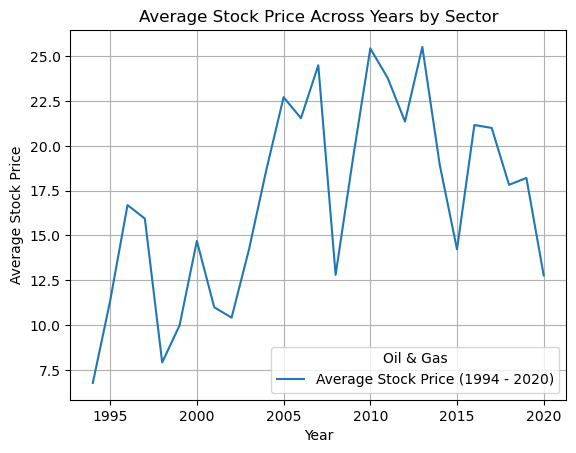

In [17]:
#calculating average stock price for the Oil and Gas industry for each year of the dataset
filtered_mean = filtered_firms.groupby('fyear')['prcc_c'].mean()

plt.plot(filtered_mean.index, filtered_mean.values, label = 'Average Stock Price (1994 - 2020)')
plt.title('Average Stock Price Across Years by Sector')
plt.xlabel('Year')
plt.ylabel('Average Stock Price')
plt.legend(title='Oil & Gas')
plt.grid(True)

plt.show()

5. Which firm was affected the most by the 2008 Financial Crisis, as measured by the percentage drop in stock price from 2007 to 2008?

In [18]:
#Name, version, company of AI tool: ChatGPT Model GPT4o mini
#Chat objective: to generate code, understand the application of a Python function code and proper syntax in our notebook
#Use of AI-generated results: We used it to understand the functionality and application of the pivot_table() function in the context of storing our 2007 and 2008 stock price data, along with understanding through the generated code how to utilize percentage change data to identify the firm most affected by the 2008 financial crisis.
#URL of chat history: https://chatgpt.com/share/6702e1ce-684c-8008-846e-29164ce9990e
#Date: 09/29/2024  (exact timestamp data not provided by ChatGPT)

In [19]:
# filters the dataframe to show only 2007 and 2008 data
df_2007_2008 = filtered_firms[(filtered_firms['fyear'] == 2007) | (filtered_firms['fyear'] == 2008)]

# arranges 2007 & 2008 data in a pivot table and calculates % change in stock price from 2007 to 2008 for each firm
pivoted_data = df_2007_2008.pivot_table(index='conm', columns='fyear', values='prcc_c')
pivoted_data['percentage_change'] = (pivoted_data[2008] - pivoted_data[2007]) / pivoted_data[2007] * 100
pivoted_data

firm_most_affected = pivoted_data['percentage_change'].idxmin()  # Firm with the largest percentage drop
firm_most_affected
max_drop = pivoted_data['percentage_change'].min()  # Value of the largest drop
print(f"The firm most affected by the 2008 Financial Crisis is {firm_most_affected} with a {max_drop:.2f}% drop in stock price from 2007 to 2008.")

The firm most affected by the 2008 Financial Crisis is BLACK RAVEN ENERGY INC with a -99.96% drop in stock price from 2007 to 2008.


6. Plot the average Return on Assets (ROA) for the firms located in the “USA” across the years.
ROA is calculated as ni/asset.

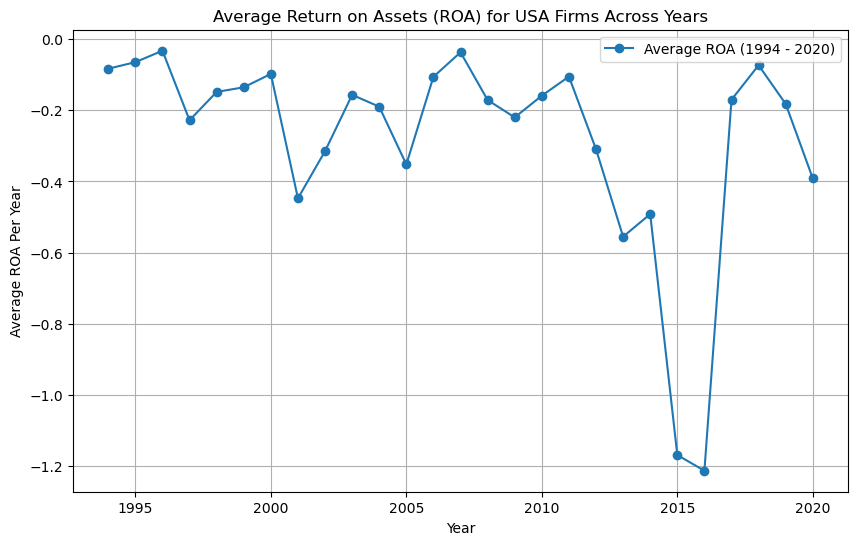

In [20]:
# filters dataset to show only USA-based firms and calculates ROA 
usa_firms = filtered_firms[filtered_firms['location'] == 'USA'].copy()
usa_firms['roa2'] = usa_firms['ni'] / usa_firms['asset']
grouped_usa = usa_firms.groupby('fyear')['roa2'].mean()

plt.figure(figsize=(10, 6))
plt.plot(grouped_usa.index, grouped_usa.values, marker='o', label='Average ROA (1994 - 2020)')

# Customize the plot
plt.title('Average Return on Assets (ROA) for USA Firms Across Years')
plt.xlabel('Year')
plt.ylabel('Average ROA Per Year')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

**Part 2. Text Analysis on the Industry Sector**
**C. [Text Cleaning] The file "data/2020_10K_item1_full.csv" contains a sample of 5,988
firms and their “item_1” content in their 10-K reports in the year 2020.2 Load the dataset as a
DataFrame and create a new column containing the cleaned text for each “item_1” content. Follow
the steps below to clean the text:**

In [21]:
# Reading the 10K reports data
company_data = pd.read_csv('2020_10K_item1_full.csv')
company_data.head(10)

,cik,year,name,item_1_text,gvkey
0,1041588,2020,ACCESS-POWER INC,fixed expenses are previosuly documented in an...,66119
1,315374,2020,HURCO COMPANIES INC,"General Hurco Companies, Inc. is an internatio...",5788
2,1622996,2020,"ACRO BIOMEDICAL CO., LTD.",We have been engaged in the business of develo...,27584
3,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614
4,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614
5,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614
6,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614
7,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614
8,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614
9,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614


1. Convert all words into lowercase.

In [22]:
# The rationale behind the code below is attributed to the Jupyter notebook 'nlp part2 keyword analysis-ba2' dealing with NLTK and text analysis created by Professor Gene Moo Lee utilised during classroom lectures.

In [23]:
#defining a function 'lowercase' to convert text into lowercase

def lowercase(word): 
    word = word.lower()
    return word

company_data['item_1'] = company_data['item_1_text'].apply(lowercase) # calling the function to convert item_1_text to lowercase and store the lowercase data in new column item_1
company_data.head(10)

,cik,year,name,item_1_text,gvkey,item_1
0,1041588,2020,ACCESS-POWER INC,fixed expenses are previosuly documented in an...,66119,fixed expenses are previosuly documented in an...
1,315374,2020,HURCO COMPANIES INC,"General Hurco Companies, Inc. is an internatio...",5788,"general hurco companies, inc. is an internatio..."
2,1622996,2020,"ACRO BIOMEDICAL CO., LTD.",We have been engaged in the business of develo...,27584,we have been engaged in the business of develo...
3,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614,corporate history chun can capital group (form...
4,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614,corporate history chun can capital group (form...
5,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614,corporate history chun can capital group (form...
6,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614,corporate history chun can capital group (form...
7,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614,corporate history chun can capital group (form...
8,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614,corporate history chun can capital group (form...
9,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614,corporate history chun can capital group (form...


2. Remove punctuations.

In [24]:
# The rationale behind the code below is attributed to the Jupyter notebook 'nlp part2 keyword analysis-ba2' dealing with NLTK and text analysis created by Professor Gene Moo Lee of the UBC Sauder School of Business.

In [25]:
#defining a function 'remove_func' to remove punctuation from text

def remove_punc(text):
    for punct in string.punctuation:
        text = text.replace(punct, '')
    return text

# applying the function to the 'item_1' column in our dataframe
company_data['item_1'] = company_data['item_1'].apply(remove_punc)

print(company_data['item_1'].tail(10))

5471    overview and strategy anavex life sciences cor...
5472    general fellazo corp  the company   we   us  o...
5473    overview we are a specialty coffee company and...
5474    celsci corporation celsci is a clinicalstage b...
5475    national holdings corporation  national   we  ...
5476    general rf industries ltd together with subsid...
5477    background and capital structure know labs inc...
5478    general gee group inc the  company   us   our ...
5479    general gulfslope energy inc is an independent...
5480    a general development of business north europe...
Name: item_1, dtype: object


3. Remove stop words based on the list of English stop words in NLTK

In [26]:
#Name, version, company of AI tool: ChatGPT Model GPT4o mini
#Chat objective: to generate code, understand the application of a Python function code and proper syntax in our notebook
#Use of AI-generated results: We used it to generate code, understand the functionality and application of the for loop in the context of checking whether each word in our 10K reports aligns with the list of stopwords in the NLTK package, and appending said word to the accumulator clean_words[] accordingly.
#URL of chat history: https://chatgpt.com/share/6702e1ce-684c-8008-846e-29164ce9990e
#Date: 09/30/2024  (exact timestamp data not provided by ChatGPT)

In [27]:
#importing the nltk package
import nltk
from nltk.corpus import stopwords 

# downloading and loading stopwords 
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# splitting the text into words for each row and storing cleaned text without stopwords in the list 'clean_words'
all_words = company_data['item_1'].str.split()
clean_words = []

for word_list in all_words:
    filtered_words = [word for word in word_list if word.lower() not in stop_words]
    clean_words.append(' '.join(filtered_words))

print(clean_words[:5]) 

#adding the cleaned text back to the column item_1
company_data['item_1'] = clean_words


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vikrammaniktala/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['fixed expenses previosuly documented 8k 235000 operate part time work home business company subcontracts big call center provides sales customer service big fortune 500 companies 2019 operated via hunter vunter subsidiary wwwliveopscom ended relationship liveops may 1st 2019 result hunter venture officially dissolved company struggled may 1 2019 october 18 2019 income period operational expenses paid patrick j jensen donation company personally paid pocket expenses dark time october 2 2019 dreamed getting greys accr dream right nowthis builders work october 18 2019 acquired grand mm llc entity subsidiary operating entity similar hunter venture entity registered state michigan httpscofslarastatemiuscorpwebcorpsearchcorpsummaryaspx id802220565 grand mm operates part time work home program another national call center similar much bigger size previour contracter provide work home sales customer services subcontracted part time basis builder building clone delivery service marijuana plan

In [28]:
company_data.head(5)

,cik,year,name,item_1_text,gvkey,item_1
0,1041588,2020,ACCESS-POWER INC,fixed expenses are previosuly documented in an...,66119,fixed expenses previosuly documented 8k 235000...
1,315374,2020,HURCO COMPANIES INC,"General Hurco Companies, Inc. is an internatio...",5788,general hurco companies inc international indu...
2,1622996,2020,"ACRO BIOMEDICAL CO., LTD.",We have been engaged in the business of develo...,27584,engaged business developing marketing products...
3,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614,corporate history chun capital group formerly ...
4,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614,corporate history chun capital group formerly ...


**[Keyword Analysis] Conduct keywords analysis on your selected industry sector(s).
Follow the steps below to complete the analysis:**

1. Create a new DataFrame that includes only firms in your selected industry sector(s). Ensure that
you merge the 10-K data with the previous "public_firm.csv" data using an inner join.

In [29]:
#Name, version, company of AI tool: ChatGPT Model GPT4o mini
#Chat objective: to generate code and understand the functionality of a Python function code and proper syntax in our notebook
#Use of AI-generated results: We used it to generate code and understand the functionality of how to implement an inner join on the basis of the unique identifier columns gvkey and fyear.
#URL of chat history: https://chatgpt.com/share/6702e1ce-684c-8008-846e-29164ce9990e
#Date: 09/30/2024  (exact timestamp data not provided by ChatGPT)

In [30]:
filtered_firms.head(5)
#renaming the 'year' column in filtered_firms to 'fyear' for the purposes of inner join
company_data.rename(columns={'year': 'fyear'}, inplace=True)


In [31]:
# combining filtered_firms and company_data data in the inner_join dataframe
inner_join = pd.merge(filtered_firms, company_data, on=['gvkey', 'fyear'], how='inner')

In [32]:
inner_join.head(10)

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa,cik,name,item_1_text,item_1
0,1380,2020,USA,HESS CORP,NaN,1311,52.7900,1739.000,-3093.000,18821.000,4667.000,-0.164338,4447,HESS CORP,"Overview CVR Energy, Inc. is a diversified hol...",overview cvr energy inc diversified holding co...
1,1661,2020,BMU,NABORS INDUSTRIES LTD,NaN,1381,58.2300,472.246,-805.641,5503.428,2134.043,-0.146389,1163739,NABORS INDUSTRIES LTD,Overview We are a bank holding company within ...,overview bank holding company within meaning b...
2,2052,2020,USA,BARNWELL INDUSTRIES,NaN,1311,1.2700,4.584,-4.756,15.182,18.329,-0.313266,10048,BARNWELL INDUSTRIES INC,Overview Barnwell was incorporated in Delaware...,overview barnwell incorporated delaware 1956 f...
3,2270,2020,BMU,VALARIS LTD,NaN,1381,0.0502,325.800,-4855.500,12873.200,1427.200,-0.377179,314808,Valaris plc,General Valaris plc is a global offshore contr...,general valaris plc global offshore contract d...
4,3469,2020,USA,CONTINENTAL RESOURCES INC,2007/05/15,1311,16.3000,47.470,-596.869,14633.098,2586.470,-0.040789,732834,"CONTINENTAL RESOURCES, INC",General We are an independent crude oil and na...,general independent crude oil natural gas comp...
5,3806,2020,USA,DAWSON GEOPHYSICAL CO,NaN,1382,2.1200,40.955,-13.196,103.377,86.100,-0.127649,799165,DAWSON GEOPHYSICAL CO,"General Dawson Geophysical Company, a Texas co...",general dawson geophysical company texas corpo...
6,4367,2020,USA,WEATHERFORD INTL PLC,2021/06/02,1381,6.0000,1118.000,-1921.000,5434.000,3685.000,-0.353515,1603923,Weatherford International plc,"Weatherford International plc, an Irish public...",weatherford international plc irish public lim...
7,5439,2020,USA,HALLIBURTON CO,NaN,1389,18.9000,2563.000,-2945.000,20680.000,14445.000,-0.142408,45012,HALLIBURTON CO,Introduction We are one of the world s largest...,introduction one world largest coal producers ...
8,5581,2020,USA,HELMERICH & PAYNE,NaN,1381,23.1600,487.884,-494.497,4829.621,1773.927,-0.102388,46765,"Helmerich & Payne, Inc.","Overview Helmerich & Payne, Inc. ( H&P, which...",overview helmerich payne inc hp together subsi...
9,6311,2020,USA,PRIMEENERGY RESOURCES CORP,NaN,1311,43.1700,0.996,-2.316,200.484,58.239,-0.011552,56868,PRIMEENERGY RESOURCES CORP,Corporation (the Company ) was organized in M...,corporation company organized march 1973 laws ...


2. Generate the top 10 keywords for each firm based on two different methods: word counts and
TF-IDF score.

In [33]:
#Name, version, company of AI tool: ChatGPT Model GPT4o mini
#Chat objective: to generate code, understand the application of a Python function code and proper syntax in our notebook
#Use of AI-generated results: We used it to generate code, understand the functionality and application of the Counter() subpackage for splitting text and counting the top 10 keywords in each 10K report by frequency, along with the application of the for loop in the context of taking each keyword from tuple 'lst' and storing it in a string list 'final_keywords' for data manipulation purposes.
#URL of chat history: https://chatgpt.com/share/6702e1ce-684c-8008-846e-29164ce9990e
#Date: 10/01/2024  (exact timestamp data not provided by ChatGPT)

In [34]:
# defining function word_count generate the top 10 keywords (by frequency) for each firm's 10K report
def word_count(text): 

    # generating the top 10 keywords along with their frequency, storing it in the list 'lst'
    c = Counter(text.split())
    lst = c.most_common(10)
    
    keywords = [] # keyword accumulator
    
    # for loop that takes each keyword from a 10K report from the list 'lst' and places it in the string final_keywords
    for pair in lst:
        keywords.append(pair[0])
        final_keywords = ' '.join(keywords) # concatenating all items in a list
        
    return final_keywords

In [35]:
# creating column TopKeywords_frequency to store the generated keywords
inner_join['TopKeywords_frequency'] = inner_join['item_1'].apply(word_count)

In [36]:
inner_join.head(5)

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa,cik,name,item_1_text,item_1,TopKeywords_frequency
0,1380,2020,USA,HESS CORP,NaN,1311,52.7900,1739.000,-3093.000,18821.000,4667.000,-0.164338,4447,HESS CORP,"Overview CVR Energy, Inc. is a diversified hol...",overview cvr energy inc diversified holding co...,fertilizer refinery coffeyville nitrogen epa 2...
1,1661,2020,BMU,NABORS INDUSTRIES LTD,NaN,1381,58.2300,472.246,-805.641,5503.428,2134.043,-0.146389,1163739,NABORS INDUSTRIES LTD,Overview We are a bank holding company within ...,overview bank holding company within meaning b...,bank loans banking financial capital federal a...
2,2052,2020,USA,BARNWELL INDUSTRIES,NaN,1311,1.2700,4.584,-4.756,15.182,18.329,-0.313266,10048,BARNWELL INDUSTRIES INC,Overview Barnwell was incorporated in Delaware...,overview barnwell incorporated delaware 1956 f...,barnwell gas oil natural 2020 net reserves fis...
3,2270,2020,BMU,VALARIS LTD,NaN,1381,0.0502,325.800,-4855.500,12873.200,1427.200,-0.377179,314808,Valaris plc,General Valaris plc is a global offshore contr...,general valaris plc global offshore contract d...,drilling us rigs contracts contract operations...
4,3469,2020,USA,CONTINENTAL RESOURCES INC,2007/05/15,1311,16.3000,47.470,-596.869,14633.098,2586.470,-0.040789,732834,"CONTINENTAL RESOURCES, INC",General We are an independent crude oil and na...,general independent crude oil natural gas comp...,gas oil natural 2019 crude reserves production...


In [37]:
# displaying top 10 keywords for 50 firms in the dataset
inner_join[['TopKeywords_frequency','conm','fyear']].head(50)

,TopKeywords_frequency,conm,fyear
0,fertilizer refinery coffeyville nitrogen epa 2...,HESS CORP,2020
1,bank loans banking financial capital federal a...,NABORS INDUSTRIES LTD,2020
2,barnwell gas oil natural 2020 net reserves fis...,BARNWELL INDUSTRIES,2020
3,drilling us rigs contracts contract operations...,VALARIS LTD,2020
4,gas oil natural 2019 crude reserves production...,CONTINENTAL RESOURCES INC,2020
5,seismic data recording equipment us services o...,DAWSON GEOPHYSICAL CO,2020
6,drilling services 2019 weatherford business we...,WEATHERFORD INTL PLC,2020
7,coal mining states epa may power operations 20...,HALLIBURTON CO,2020
8,drilling rigs 2020 us operations oil fiscal ri...,HELMERICH & PAYNE,2020
9,gas oil wells natural may operations productio...,PRIMEENERGY RESOURCES CORP,2020


In [38]:
#Name, version, company of AI tool: ChatGPT Model GPT4o mini
#Chat objective: to generate code, understand the application of a Python function code and proper syntax in our notebook
#Use of AI-generated results: We used it to generate code, understand the functionality and application of the user defined get_keywords_tfidf method for vectorizing the top 10 keywords for each 10K, along with the for loop's role in caclulating the appropriate TF-IDF score for each unique keyword. 
#URL of chat history: https://chatgpt.com/share/6702e1ce-684c-8008-846e-29164ce9990e
#Date: 10/01/2024  (exact timestamp data not provided by ChatGPT)

In [39]:
# defining function word_count generate the top 10 keywords (by TF-IDF score) for each firm's 10K report

def get_keywords_tfidf(document_list):
    
    vectorizer = TfidfVectorizer() 
    tfidf_matrix = vectorizer.fit_transform(document_list) 
    feature_names = vectorizer.get_feature_names_out() 

    top_keywords = [] # accumulator
    for i in range(len(document_list)):
        feature_index = tfidf_matrix[i, :].nonzero()[1]
        feature_value = [tfidf_matrix[i, x] for x in feature_index]
        tfidf_scores = zip(feature_index, feature_value)
        sorted_tfidf_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)
        top_keywords.append(' '.join([feature_names[i] for i, _ in sorted_tfidf_scores[:10]]))

        if i % 200 == 199:
            print(f'Processed {i+1}/{len(document_list)} documents.')
    
    return top_keywords

In [40]:
documents = inner_join['item_1'].tolist()

# storing the top keywords using TF-IDF for all documents in the 'TopKeywords_TF/IDF' column
inner_join['TopKeywords_TF/IDF'] = get_keywords_tfidf(documents)

In [41]:
inner_join.head(30)

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa,cik,name,item_1_text,item_1,TopKeywords_frequency,TopKeywords_TF/IDF
0,1380,2020,USA,HESS CORP,NaN,1311,52.7900,1739.000,-3093.000,18821.000,4667.000,-0.164338,4447,HESS CORP,"Overview CVR Energy, Inc. is a diversified hol...",overview cvr energy inc diversified holding co...,fertilizer refinery coffeyville nitrogen epa 2...,fertilizer coffeyville refinery nitrogen cvr w...
1,1661,2020,BMU,NABORS INDUSTRIES LTD,NaN,1381,58.2300,472.246,-805.641,5503.428,2134.043,-0.146389,1163739,NABORS INDUSTRIES LTD,Overview We are a bank holding company within ...,overview bank holding company within meaning b...,bank loans banking financial capital federal a...,bank loans banking loan institution fdic alaba...
2,2052,2020,USA,BARNWELL INDUSTRIES,NaN,1311,1.2700,4.584,-4.756,15.182,18.329,-0.313266,10048,BARNWELL INDUSTRIES INC,Overview Barnwell was incorporated in Delaware...,overview barnwell incorporated delaware 1956 f...,barnwell gas oil natural 2020 net reserves fis...,barnwell kd kaupulehu gas oil natural twining ...
3,2270,2020,BMU,VALARIS LTD,NaN,1381,0.0502,325.800,-4855.500,12873.200,1427.200,-0.377179,314808,Valaris plc,General Valaris plc is a global offshore contr...,general valaris plc global offshore contract d...,drilling us rigs contracts contract operations...,rowan drilling aro valaris rigs jackup neglige...
4,3469,2020,USA,CONTINENTAL RESOURCES INC,2007/05/15,1311,16.3000,47.470,-596.869,14633.098,2586.470,-0.040789,732834,"CONTINENTAL RESOURCES, INC",General We are an independent crude oil and na...,general independent crude oil natural gas comp...,gas oil natural 2019 crude reserves production...,gas crude bakken oil natural reserves 2019 pro...
5,3806,2020,USA,DAWSON GEOPHYSICAL CO,NaN,1382,2.1200,40.955,-13.196,103.377,86.100,-0.127649,799165,DAWSON GEOPHYSICAL CO,"General Dawson Geophysical Company, a Texas co...",general dawson geophysical company texas corpo...,seismic data recording equipment us services o...,seismic recording dawson multi data channels c...
6,4367,2020,USA,WEATHERFORD INTL PLC,2021/06/02,1381,6.0000,1118.000,-1921.000,5434.000,3685.000,-0.353515,1603923,Weatherford International plc,"Weatherford International plc, an Irish public...",weatherford international plc irish public lim...,drilling services 2019 weatherford business we...,weatherford bankruptcy drilling plc services 2...
7,5439,2020,USA,HALLIBURTON CO,NaN,1389,18.9000,2563.000,-2945.000,20680.000,14445.000,-0.142408,45012,HALLIBURTON CO,Introduction We are one of the world s largest...,introduction one world largest coal producers ...,coal mining states epa may power operations 20...,coal mining mine metallurgical epa seam power ...
8,5581,2020,USA,HELMERICH & PAYNE,NaN,1381,23.1600,487.884,-494.497,4829.621,1773.927,-0.102388,46765,"Helmerich & Payne, Inc.","Overview Helmerich & Payne, Inc. ( H&P, which...",overview helmerich payne inc hp together subsi...,drilling rigs 2020 us operations oil fiscal ri...,rigs flexrig drilling rig fiscal percent solut...
9,6311,2020,USA,PRIMEENERGY RESOURCES CORP,NaN,1311,43.1700,0.996,-2.316,200.484,58.239,-0.011552,56868,PRIMEENERGY RESOURCES CORP,Corporation (the Company ) was organized in M...,corporation company organized march 1973 laws ...,gas oil wells natural may operations productio...,gas oil wells natural ferc production may oper...


3. Create two wordclouds to visualize the keywords across all firms in the selected sector(s): one
based on the word counts and another based on the TF-IDF scores.

In [42]:
# importing wordcloud packages 
from wordcloud import WordCloud
from PIL import Image

In [43]:
#Name, version, company of AI tool: ChatGPT Model GPT4o mini
#Chat objective: to generate code, troubleshoot, and understand the application of a Python function code and proper syntax in our notebook
#Use of AI-generated results: We used it to generate code for creating a wordcloud, and troubleshoot to avoid repetition of keywords in the wordcloud.  
#URL of chat history: https://chatgpt.com/share/6702e1ce-684c-8008-846e-29164ce9990e
#Date: 10/02/2024  (exact timestamp data not provided by ChatGPT)

In [44]:
#parts of code have been borrowed / inspired from the Jupyter notebook 'nlp part2 keyword analysis-ba2' dealing with NLTK and textual analysis, created by Professor Gene Moo Lee of the UBC Sauder School of Business. 

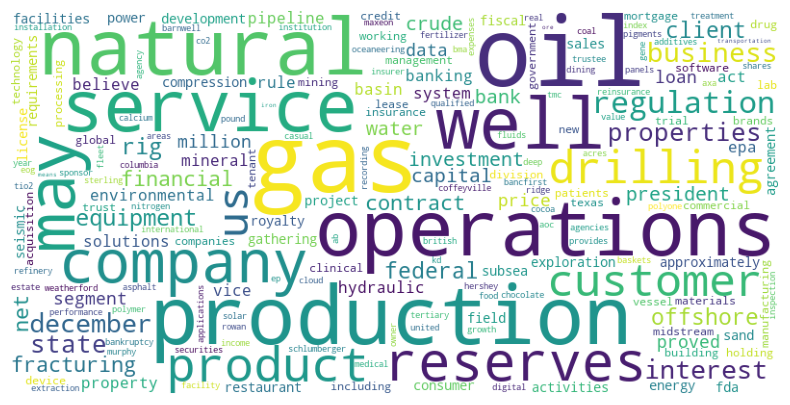

In [45]:
# generating wordcloud by the top keywords by frequency
keyword_by_frequency = ' '.join(inner_join['TopKeywords_frequency'].tolist())
wordcloud = WordCloud(
    width=800, 
    height=400, 
    max_font_size=100, 
    background_color='white', 
    collocations=False  # This will prevent combinations of words
).generate(keyword_by_frequency)  

plt.figure(figsize=(10,5))
plt.axis('off')
plt.imshow(wordcloud)
plt.savefig('keyword_all.png')
plt.show()

In [46]:
#Name, version, company of AI tool: ChatGPT Model GPT4o mini
#Chat objective: to generate code, troubleshoot, and understand the application of a Python function code and proper syntax in our notebook
#Use of AI-generated results: We used it to generate code for creating a wordcloud, and manually adjusted the height, width etc of said wordcloud to ensure greater clarity.  
#URL of chat history: https://chatgpt.com/share/6702e1ce-684c-8008-846e-29164ce9990e
#Date: 10/02/2024  (exact timestamp data not provided by ChatGPT)

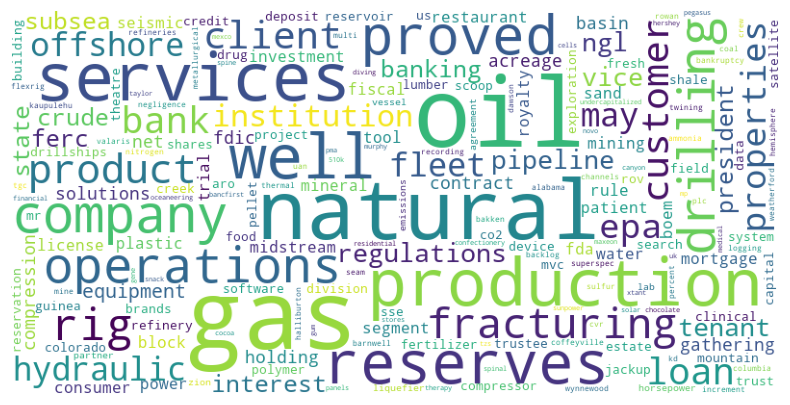

In [47]:
# generating wordcloud by the top keywords by TF-IDF score

keyword_by_TFIDF = ' '.join(inner_join['TopKeywords_TF/IDF'].tolist())
wordcloud = WordCloud(
    width=800, 
    height=400, 
    max_font_size=100, 
    background_color='white', 
    collocations=False  # This will prevent combinations of words
).generate(keyword_by_TFIDF)  

plt.figure(figsize=(10,5))
plt.axis('off')
plt.imshow(wordcloud)
plt.savefig('keyword_all.png')
plt.show()

1. Train a word2vec model with the full 10-K sample (e.g., "data/2020_10K_item1_full.csv").
Please use the cleaned text (e.g., results from Step C) for training.

In [48]:
#Name, version, company of AI tool: ChatGPT Model GPT4o mini
#Chat objective: to generate code, troubleshoot, and understand the application of a Python function code and proper syntax in our notebook
#Use of AI-generated results: We used it to generate code to create a word2vec model on our data, and understand the meaning of the various parameters associated with it, for example, workers, vectors_size and attempted to adjust them manually. 
#URL of chat history: https://chatgpt.com/share/6702e1ce-684c-8008-846e-29164ce9990e
#Date: 10/03/2024  (exact timestamp data not provided by ChatGPT)

In [49]:
from gensim.models import Word2Vec

In [50]:
rows = [item.split() for item in inner_join['item_1']]

In [51]:
model = Word2Vec(rows, min_count=5, vector_size=50, workers=3, window=5, sg = 1)

In [52]:
model.save("word2vec.model_text_analysis")

In [53]:
model = Word2Vec.load("word2vec.model_text_analysis")

2. Manually inspect the wordclouds you generated in D.3 and choose three representative
keywords that are relevant to the industry sector of your interest. Utilize the trained word2vec
model to find the most relevant five words for each of these three keywords.

Note: We chose 'Oil', 'Production' and 'Reserves' as the most representative keywords of the Oil & Gas industry upon examining the wordclouds

In [54]:
#Name, version, company of AI tool: ChatGPT Model GPT4o mini
#Chat objective: to generate code and understand the application of a Python function code and proper syntax in our notebook
#Use of AI-generated results: We used it to understand the meaning and applications of the various methods associated with 'wv' subpackage, including the relevance of .most_similar in our present use case.  
#URL of chat history: https://chatgpt.com/share/6702e1ce-684c-8008-846e-29164ce9990e
#Date: 10/03/2024  (exact timestamp data not provided by ChatGPT)

In [55]:
model.wv.most_similar('oil', topn=5)

[('natural', 0.9008170962333679),
 ('gas', 0.8829049468040466),
 ('crude', 0.8173959851264954),
 ('production', 0.7431341409683228),
 ('liquids', 0.7357993125915527)]

In [56]:
model.wv.most_similar('production', topn=5)

[('oil', 0.743134081363678),
 ('gas', 0.7403037548065186),
 ('natural', 0.7189024686813354),
 ('crude', 0.7103344202041626),
 ('exploration', 0.6962925791740417)]

In [57]:
model.wv.most_similar('reserves', topn=5)

[('proved', 0.9362531900405884),
 ('estimated', 0.8296098709106445),
 ('undeveloped', 0.8138511180877686),
 ('estimates', 0.7951288819313049),
 ('pud', 0.7833986878395081)]

**Part 3. Comprehensive Analysis of One Sample Firm
F. [Firm Analysis and Strategy Suggestion] This is an open question. Pick one firm that
your group is interested in and try to analyze its market status. The ultimate goal is to provide one
valuable suggestion to the firm based on your analysis. Some directions you might consider are,
but not limited to:**

1. Convert the keywords extracted in D.2 into word embeddings with the word2vec model trained
in E.1. Add up the embeddings for each firm to create the firm-level embeddings. Use the firm-
level embeddings to find the focal firm’s competing firms (or most similar firms).

In [58]:
#Name, version, company of AI tool: ChatGPT Model GPT4o mini
#Chat objective: to generate code and understand the application of a Python function code and proper syntax in our notebook
#Use of AI-generated results: We used it to generate code for looping through each keyword and getting its vectorized embedding if it is the model vocabulary, storing the cumulation/sum of these embeddings in a new column.   
#URL of chat history: https://chatgpt.com/share/6702e1ce-684c-8008-846e-29164ce9990e
#Date: 10/03/2024  (exact timestamp data not provided by ChatGPT)

In [59]:
def get_firm_embedding(keywords, word2vec_model):
    # Initializing an empty aggregator list
    embeddings = []
    
    # Looping through each keyword and get its embedding if it's in the model vocabulary
    for word in keywords:
        if word in word2vec_model.wv:
            embeddings.append(word2vec_model.wv[word])
    
    # Returning the sum of the embeddings (firm-level embedding)
    if embeddings:
        return np.sum(embeddings, axis=0)  # Sum across vectors
    else:
        return np.zeros(word2vec_model.vector_size)  # If no keywords are found, return a zero vector

# Creating a new column to store the firm-level embeddings
inner_join['firm_embedding'] = inner_join['TopKeywords_frequency'].apply(lambda x: get_firm_embedding(x, model))

In [60]:
inner_join.head(10)

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa,cik,name,item_1_text,item_1,TopKeywords_frequency,TopKeywords_TF/IDF,firm_embedding
0,1380,2020,USA,HESS CORP,NaN,1311,52.7900,1739.000,-3093.000,18821.000,4667.000,-0.164338,4447,HESS CORP,"Overview CVR Energy, Inc. is a diversified hol...",overview cvr energy inc diversified holding co...,fertilizer refinery coffeyville nitrogen epa 2...,fertilizer coffeyville refinery nitrogen cvr w...,"[5.326502, 17.22725, 17.960215, 23.245127, 28...."
1,1661,2020,BMU,NABORS INDUSTRIES LTD,NaN,1381,58.2300,472.246,-805.641,5503.428,2134.043,-0.146389,1163739,NABORS INDUSTRIES LTD,Overview We are a bank holding company within ...,overview bank holding company within meaning b...,bank loans banking financial capital federal a...,bank loans banking loan institution fdic alaba...,"[3.541757, 9.379783, 12.010981, 15.033624, 17...."
2,2052,2020,USA,BARNWELL INDUSTRIES,NaN,1311,1.2700,4.584,-4.756,15.182,18.329,-0.313266,10048,BARNWELL INDUSTRIES INC,Overview Barnwell was incorporated in Delaware...,overview barnwell incorporated delaware 1956 f...,barnwell gas oil natural 2020 net reserves fis...,barnwell kd kaupulehu gas oil natural twining ...,"[6.2134147, 11.9779215, 14.083704, 15.838518, ..."
3,2270,2020,BMU,VALARIS LTD,NaN,1381,0.0502,325.800,-4855.500,12873.200,1427.200,-0.377179,314808,Valaris plc,General Valaris plc is a global offshore contr...,general valaris plc global offshore contract d...,drilling us rigs contracts contract operations...,rowan drilling aro valaris rigs jackup neglige...,"[6.5450706, 10.8449545, 12.866836, 13.938181, ..."
4,3469,2020,USA,CONTINENTAL RESOURCES INC,2007/05/15,1311,16.3000,47.470,-596.869,14633.098,2586.470,-0.040789,732834,"CONTINENTAL RESOURCES, INC",General We are an independent crude oil and na...,general independent crude oil natural gas comp...,gas oil natural 2019 crude reserves production...,gas crude bakken oil natural reserves 2019 pro...,"[4.85248, 12.642161, 14.055714, 18.143496, 23...."
5,3806,2020,USA,DAWSON GEOPHYSICAL CO,NaN,1382,2.1200,40.955,-13.196,103.377,86.100,-0.127649,799165,DAWSON GEOPHYSICAL CO,"General Dawson Geophysical Company, a Texas co...",general dawson geophysical company texas corpo...,seismic data recording equipment us services o...,seismic recording dawson multi data channels c...,"[2.1944308, 9.456235, 10.302242, 13.68962, 18...."
6,4367,2020,USA,WEATHERFORD INTL PLC,2021/06/02,1381,6.0000,1118.000,-1921.000,5434.000,3685.000,-0.353515,1603923,Weatherford International plc,"Weatherford International plc, an Irish public...",weatherford international plc irish public lim...,drilling services 2019 weatherford business we...,weatherford bankruptcy drilling plc services 2...,"[6.907599, 18.178688, 20.530767, 25.942867, 32..."
7,5439,2020,USA,HALLIBURTON CO,NaN,1389,18.9000,2563.000,-2945.000,20680.000,14445.000,-0.142408,45012,HALLIBURTON CO,Introduction We are one of the world s largest...,introduction one world largest coal producers ...,coal mining states epa may power operations 20...,coal mining mine metallurgical epa seam power ...,"[4.0868998, 9.054271, 9.587798, 11.839378, 16...."
8,5581,2020,USA,HELMERICH & PAYNE,NaN,1381,23.1600,487.884,-494.497,4829.621,1773.927,-0.102388,46765,"Helmerich & Payne, Inc.","Overview Helmerich & Payne, Inc. ( H&P, which...",overview helmerich payne inc hp together subsi...,drilling rigs 2020 us operations oil fiscal ri...,rigs flexrig drilling rig fiscal percent solut...,"[6.6576457, 9.589787, 11.118039, 12.332771, 16..."
9,6311,2020,USA,PRIMEENERGY RESOURCES CORP,NaN,1311,43.1700,0.996,-2.316,200.484,58.239,-0.011552,56868,PRIMEENERGY RESOURCES CORP,Corporation (the Company ) was organized in M...,corporation company organized march 1973 laws ...,gas oil wells natural may operations productio...,gas oil wells natural ferc production may oper...,"[5.264189, 9.199592, 10.446754, 11.353954, 18...."


In [61]:
#Name, version, company of AI tool: ChatGPT Model GPT4o mini
#Chat objective: to generate code and understand the application of a Python function code and proper syntax in our notebook
#Use of AI-generated results: We used it to generate code and understanding the relevance of the cosine_similarity subpackage in finding similarities between the vectorized firm embeddings and consequently generate the top 5 competitor firms to our chosen firm.   
#URL of chat history: https://chatgpt.com/share/6702e1ce-684c-8008-846e-29164ce9990e
#Date: 10/03/2024  (exact timestamp data not provided by ChatGPT)

In [62]:
from sklearn.metrics.pairwise import cosine_similarity

# Getting the firm embeddings as a matrix (each row is a firm's embedding)
firm_embeddings_matrix = np.stack(inner_join['firm_embedding'].values)

# Computing cosine similarity between all firms
similarities = cosine_similarity(firm_embeddings_matrix)

# Converting similarities into a DataFrame for easier lookup
similarity_df = pd.DataFrame(similarities, index=inner_join['conm'], columns=inner_join['conm'])

# Finding the top 5 most similar firms for a given firm (focal firm)
focal_firm = 'SCHLUMBERGER LTD'  # Replace this with the actual focal firm name
top_5_similar_firms = similarity_df[focal_firm].nlargest(6)[1:]  # Exclude the firm itself

print(f"Top 5 similar firms to {focal_firm}:\n", top_5_similar_firms)

Top 5 similar firms to SCHLUMBERGER LTD:
 conm
SANDRIDGE ENERGY INC         0.999472
MATADOR RESOURCES CO         0.998980
CONTINENTAL RESOURCES INC    0.998941
LONESTAR RESOURCES US INC    0.998170
QEP RESOURCES INC            0.997286
Name: SCHLUMBERGER LTD, dtype: float32


In [63]:
# This generates the similar output as above, but in the form of a dataframe that also presents relevant KPIs for the chosen firm and its competitors

firms = ['SCHLUMBERGER LTD', 'SANDRIDGE ENERGY INC', 'MATADOR RESOURCES CO', 
         'CONTINENTAL RESOURCES INC', 'LONESTAR RESOURCES US INC', 'QEP RESOURCES INC']
filtered_company_data = company_data[company_data['name'].isin(firms)]

print('The following represents relevant KPIs for SCHLUMBERGER LTD and its top 5 competing firms (as identified by the      model)')
comparison_data

The following represents relevant KPIs for SCHLUMBERGER LTD and its top 5 competing firms (as identified by the      model)


NameError: name 'comparison_data' is not defined

2. Compare the revenue, market share, and ROA of the focal firm to its competitors and provide
suggestions accordingly.

In [64]:
#Name, version, company of AI tool: ChatGPT Model GPT4o mini
#Chat objective: to generate code, troubleshoot and understand the application of a Python function code and proper syntax in our notebook
#Use of AI-generated results: We used it to correct issues with the firm names' casing via the str.strip.str.lower(), along with understanding the need to store relevant firm names in a list 'firms' in order to check whether these firms are present in the rest of the dataframe. 
#URL of chat history: https://chatgpt.com/share/6702e1ce-684c-8008-846e-29164ce9990e
#Date: 10/03/2024  (exact timestamp data not provided by ChatGPT)

In [65]:
df1['conm'] = df1['conm'].str.strip().str.lower()
firms = ['schlumberger ltd', 'sandridge energy inc', 'matador resources co', 
         'continental resources inc', 'lonestar resources us inc', 'qep resources inc']

filtered_df1 = df1[df1['conm'].isin(firms)]
filtered_df1 = filtered_df1[['fyear', 'conm', 'sale', 'roa', 'asset', 'ni', 'prcc_c']]
filtered_df1.head(30)

,fyear,conm,sale,roa,asset,ni,prcc_c
9890,2002,continental resources inc,300.291,-0.049258,406.677,-20.032,NaN
9891,2003,continental resources inc,392.068,0.004825,484.988,2.340,NaN
9892,2005,continental resources inc,375.764,0.323719,600.234,194.307,NaN
9893,2006,continental resources inc,483.652,0.294655,858.929,253.088,NaN
9894,2007,continental resources inc,582.215,0.020935,1365.173,28.580,26.1300
9895,2008,continental resources inc,960.490,0.144841,2215.879,320.950,20.7100
9896,2009,continental resources inc,626.211,0.030817,2314.927,71.338,42.8900
9897,2010,continental resources inc,839.065,0.046844,3591.785,168.255,58.8500
9898,2011,continental resources inc,1649.789,0.075995,5646.086,429.072,66.7100
9899,2012,continental resources inc,2572.520,0.080895,9140.009,739.385,73.4900


In [66]:
#Name, version, company of AI tool: ChatGPT Model GPT4o mini
#Chat objective: to generate matplotlib code and understand the application of a Python function code and proper syntax in our notebook
#Use of AI-generated results: We used it to generate line plots, comparing the firm-wise year-on-year trend for KPIs including sales, net income, assets, and ROA. 
#URL of chat history: https://chatgpt.com/share/6702e1ce-684c-8008-846e-29164ce9990e
#Date: 10/05/2024  (exact timestamp data not provided by ChatGPT)

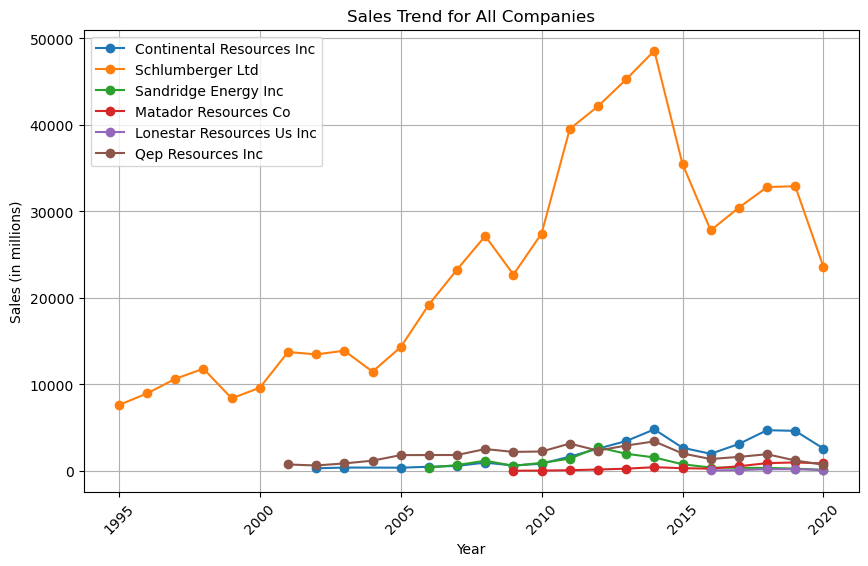

In [67]:
# List of relevant firms
firms = ['continental resources inc', 'schlumberger ltd', 'sandridge energy inc',
         'matador resources co', 'lonestar resources us inc', 'qep resources inc']

# Plot Sales for all firms
plt.figure(figsize=(10, 6))
for firm in firms:
    firm_data = filtered_df1[filtered_df1['conm'] == firm]
    plt.plot(firm_data['fyear'], firm_data['sale'], marker='o', label=firm.title())

plt.title('Sales Trend for All Companies')
plt.xlabel('Year')
plt.ylabel('Sales (in millions)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

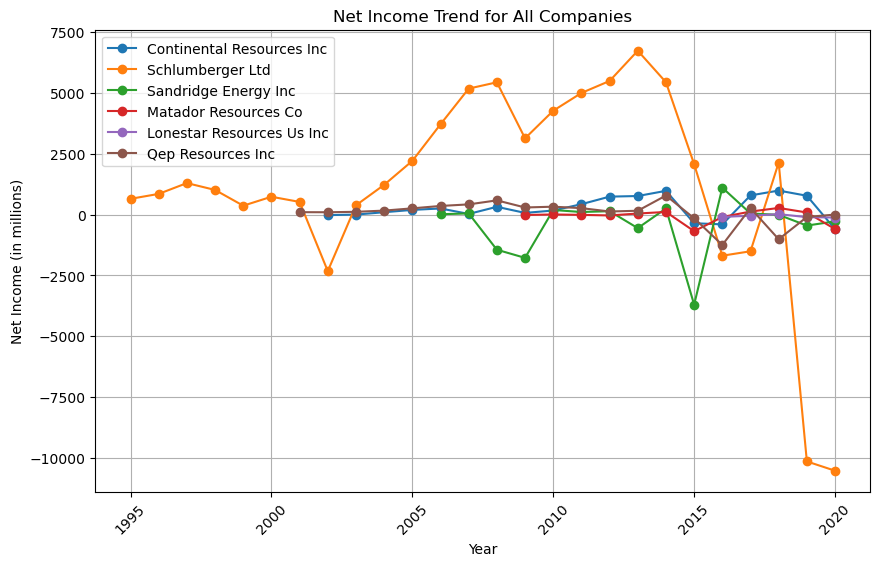

In [68]:
plt.figure(figsize=(10, 6))
for firm in firms:
    firm_data = filtered_df1[filtered_df1['conm'] == firm]
    plt.plot(firm_data['fyear'], firm_data['ni'], marker='o', label=firm.title())

plt.title('Net Income Trend for All Companies')
plt.xlabel('Year')
plt.ylabel('Net Income (in millions)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

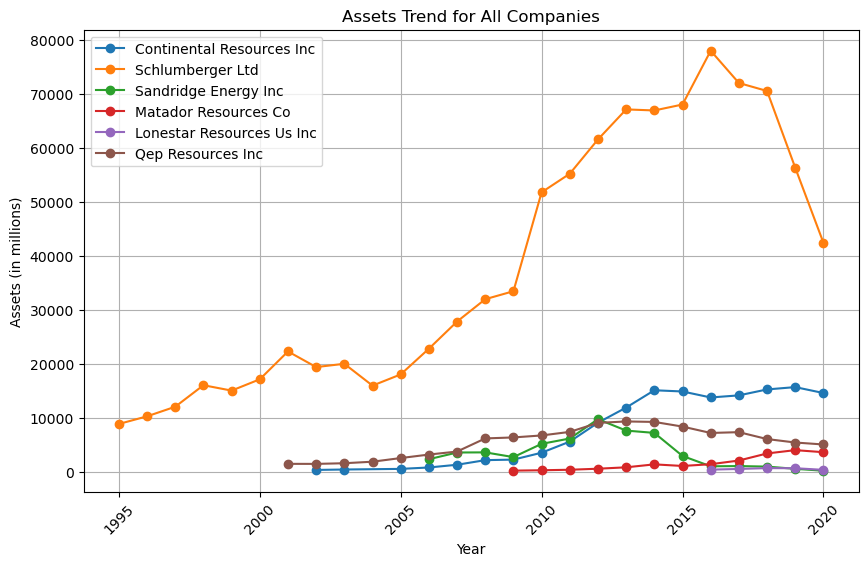

In [69]:
# Plot Assets for all firms
plt.figure(figsize=(10, 6))
for firm in firms:
    firm_data = filtered_df1[filtered_df1['conm'] == firm]
    plt.plot(firm_data['fyear'], firm_data['asset'], marker='o', label=firm.title())

plt.title('Assets Trend for All Companies')
plt.xlabel('Year')
plt.ylabel('Assets (in millions)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

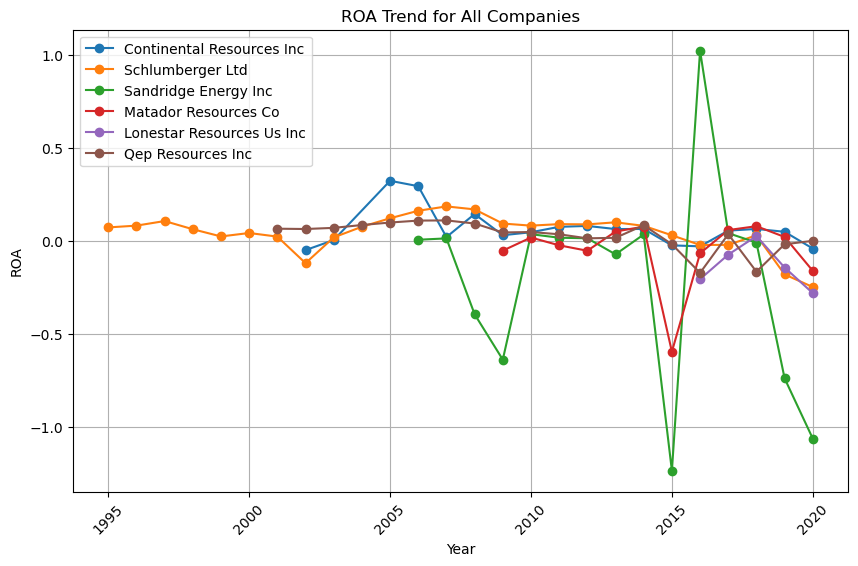

In [70]:
# Plot ROA for all firms
plt.figure(figsize=(10, 6))
for firm in firms:
    firm_data = filtered_df1[filtered_df1['conm'] == firm]
    plt.plot(firm_data['fyear'], firm_data['roa'], marker='o', label=firm.title())

plt.title('ROA Trend for All Companies')
plt.xlabel('Year')
plt.ylabel('ROA')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

3. Perform an analysis of the historical stock prices, ROA, revenue, and assets of the chosen firm.
Investigate potential correlations and address noteworthy decreases and increases.

In [71]:
#Name, version, company of AI tool: ChatGPT Model GPT4o mini
#Chat objective: to generate code and understand the application of a Python function code and proper syntax in our notebook
#Use of AI-generated results: We used it to generate code and understand the meaning and applications of the .corr() matrix to carry out effective correlation analysis for our chosen firm's KPIs.  
#URL of chat history: https://chatgpt.com/share/6702e1ce-684c-8008-846e-29164ce9990e
#Date: 10/05/2024  (exact timestamp data not provided by ChatGPT)

In [72]:
# Filter data for the chosen firm (e.g., 'schlumberger ltd')
chosen_firm = 'schlumberger ltd'
firm_data = filtered_df1[filtered_df1['conm'] == chosen_firm]

# Calculate the correlation between stock price, ROA, revenue, and assets
correlation_matrix = firm_data[['prcc_c', 'roa', 'sale', 'asset']].corr()

# Display the correlation matrix
print("Correlation Matrix for schlumberger ltd's KPIs:")
print(correlation_matrix)

Correlation Matrix for schlumberger ltd's KPIs:
          prcc_c       roa      sale     asset
prcc_c  1.000000  0.603954  0.050506 -0.011715
roa     0.603954  1.000000 -0.004462 -0.207747
sale    0.050506 -0.004462  1.000000  0.891478
asset  -0.011715 -0.207747  0.891478  1.000000


In [73]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vikrammaniktala/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [74]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/vikrammaniktala/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [75]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [76]:
df1

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa
0,1004,1994,USA,aar corp,1988/01/01,5080,13.375,22.487,10.463,425.814,451.395,0.024572
1,1004,1995,USA,aar corp,1988/01/01,5080,22.000,33.606,16.012,437.846,504.990,0.036570
2,1004,1996,USA,aar corp,1988/01/01,5080,30.250,51.705,23.025,529.584,589.328,0.043478
3,1004,1997,USA,aar corp,1988/01/01,5080,38.750,17.222,35.657,670.559,782.123,0.053175
4,1004,1998,USA,aar corp,1988/01/01,5080,23.875,8.250,41.671,726.630,918.036,0.057348
...,...,...,...,...,...,...,...,...,...,...,...,...
209207,345980,2019,USA,contextlogic inc,2020/12/16,5961,NaN,744.000,-129.000,1366.000,1901.000,-0.094436
209208,345980,2020,USA,contextlogic inc,2020/12/16,5961,18.240,1965.000,-745.000,2397.000,2541.000,-0.310805
209209,347085,2018,SGP,karooooo ltd,2021/04/01,7370,NaN,3.692,16.851,108.754,120.390,0.154946
209210,347085,2019,SGP,karooooo ltd,2021/04/01,7370,NaN,9.339,18.467,117.551,123.708,0.157098


In [77]:
df1_unique1 = df1.drop_duplicates(subset='conm')

In [78]:
df1_unique1

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa
0,1004,1994,USA,aar corp,1988/01/01,5080,13.375,22.487,10.463,425.814,451.395,0.024572
27,1010,1995,USA,acf industries inc,NaN,3743,NaN,NaN,84.300,2015.800,407.200,0.041820
36,1013,1995,USA,adc telecommunications inc,1979/03/16,3661,36.500,238.491,55.186,601.083,586.222,0.091811
52,1017,1994,USA,ael industries -cl a,NaN,3812,9.250,3.140,1.769,101.418,126.780,0.017443
53,1019,1995,USA,afa protective systems inc,NaN,7380,115.000,4.565,1.339,28.487,27.492,0.047004
...,...,...,...,...,...,...,...,...,...,...,...,...
209198,332115,2019,USA,armata pharmaceuticals inc,NaN,2836,3.250,6.033,-19.479,25.451,0.000,-0.765353
209200,339965,2018,USA,snowflake inc,2020/09/10,7370,NaN,116.541,-178.028,764.288,96.666,-0.232933
209203,345920,2018,USA,hydrofarm hldng gp inc,2020/12/10,3524,NaN,27.923,-32.892,174.411,211.813,-0.188589
209206,345980,2018,USA,contextlogic inc,2020/12/16,5961,NaN,712.000,-208.000,1193.000,1728.000,-0.174350


In [83]:
merged_df = pd.merge(df1_unique1, company_data, on='conm', how='inner')

In [82]:
company_data

,cik,fyear,conm,item_1_text,gvkey,item_1
0,1041588,2020,ACCESS-POWER INC,fixed expenses are previosuly documented in an...,66119,fixed expenses previosuly documented 8k 235000...
1,315374,2020,HURCO COMPANIES INC,"General Hurco Companies, Inc. is an internatio...",5788,general hurco companies inc international indu...
2,1622996,2020,"ACRO BIOMEDICAL CO., LTD.",We have been engaged in the business of develo...,27584,engaged business developing marketing products...
3,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614,corporate history chun capital group formerly ...
4,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614,corporate history chun capital group formerly ...
...,...,...,...,...,...,...
5476,740664,2020,R F INDUSTRIES LTD,"General RF Industries, Ltd. (together with sub...",2829,general rf industries ltd together subsidiarie...
5477,1074828,2020,"KNOW LABS, INC.","BACKGROUND AND CAPITAL STRUCTURE Know Labs, In...",166430,background capital structure know labs inc inc...
5478,40570,2020,GEE Group Inc.,"General GEE Group Inc. (the Company , us , ...",5050,general gee group inc company us incorporated ...
5479,1341726,2020,"GULFSLOPE ENERGY, INC.","General GulfSlope Energy, Inc. is an independe...",175595,general gulfslope energy inc independent crude...


In [81]:
company_data.rename(columns={'name': 'conm'}, inplace=True)

In [85]:
merged_df

,gvkey_x,fyear_x,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa,cik,fyear_y,item_1_text,gvkey_y,item_1
